# Notebook 03 - Data Analysis

## Objectives

* Answer business requirement 1: "The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualisations of the correlated variables against the sale price."
    - Load and inspect the cleaned dataset created in the previous notebook
    - Conduct a correlation study to see what variables most strongly influence the sale price
    - Conduct a Predictive Power Score study to see what variables most strongly influence the sale price
    - Create visualisations to illustrate the correlations
    - Summarise the findings and provide insights on the relationship between house attributes and sale prices
    - Identify next steps

## Inputs

* outputs/datasets/cleaned/v1/house_price_records_cleaned.csv

## Outputs

* Code that answers business requirement 1 and can be used to build Streamlit app
* Plots saved in folder for documentation 

## [Conclusions]

* [Conclusions here]

---

# Import Packages

In [1]:
import os
import pandas as pd
from ydata_profiling import ProfileReport
from feature_engine.encoding import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

# Change working directory

* This notebook is stored in the `jupyter_notebooks` subfolder
* The current working directory therefore needs to be changed to the workspace, i.e., the working directory needs to be changed from the current folder to its parent folder

Firstly, the current directory is accessed with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\franc\\housing-price-predictor\\jupyter_notebooks'

Next, the working directory is set as the parent of the current `jupyter_notebooks` directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory
* This allows access to all the files and folders within the workspace, rather than solely those within the `jupyter_notebooks` directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Finally, confirm that the new current directory has been successfully set

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\franc\\housing-price-predictor'

---

# Load Data

The data is loaded from the outputs/datasets/outputs/datasets/cleaned/v1 folder:

In [5]:
df = pd.read_csv('outputs/datasets/cleaned/v1/house_price_records_cleaned.csv')
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


---

# Pandas Profile Report

In order to become more familiar with the dataset, we can create a Pandas profile report:

In [6]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* We see that there are 22 variables in total, with 18 numerical and four categorical.
* The categorical variables are as follows:
    - `BsmtExposure`
    - `BsmtFinType1`
    - `GarageFinish`
    - `KitchenQual`

* Since we are now using the cleaned dataset, no variables have missing values.
    - This is important since we will use One Hot Encoding on categorical variables, and this will not work with missing values.

---

# Correlation Study

## Treatment of categorical variables

The dataset has a number of categorical variables. These can be transformed using [One Hot Encoding](https://feature-engine.trainindata.com/en/1.1.x/encoding/OneHotEncoder.html) (OHE).

* The categorical variables are encoded into a binary format in order to convert them from the 'object' data type. This transformation allows them to be used in correlation coefficient calculations.
* Note that OHE is preferred over ordinal encoding for categorical variables in machine learning. OHE is used because it avoids creating artificial ordinal relationships between categories, which could introduce bias into the model. OHE ensures that all categories are treated as equally important, preventing any unintended preference for labels encoded with higher numbers in the case of ordinal encoding.

In [7]:
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head()

(1460, 39)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,65.0,...,0,0,1,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,80.0,...,0,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,68.0,...,0,0,1,0,0,0,1,0,0,0
3,961,0.0,3.0,216,540,642,1998.0,1717,9550,60.0,...,0,0,0,1,0,0,1,0,0,0
4,1145,0.0,4.0,655,490,836,2000.0,2198,14260,84.0,...,0,0,1,0,0,0,1,0,0,0


Note that this increases the number of columns in the dataset, because each value of each categorical variable in the original dataset is now represented by a column, with the value in the new column encoded as 1 if the value is present and 0 if it is not.

## Heatmaps

The following code is copied and adapted from Code Institute Walkthrough Project 2 and is used to create heatmaps for Spearman and Pearson correlation, as well as a PPS heatmap.

In [8]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def calculate_corr_and_pps(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def display_corr_and_pps(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for the ML model is correlated with other variables")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("This evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("This evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

We can use this code to calculate the Pearson (linear) and Spearman (monotonic) correlations, and the Power Predictive Score.

* The Power Predictive Score (PPS) is defined in [its documentation](https://github.com/8080labs/ppscore) as follows: "The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix)."

In [9]:
df_corr_pearson, df_corr_spearman, pps_matrix = calculate_corr_and_pps(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.059  0.113  0.0  0.0  0.0  0.076  0.891


Now we can display the heatmaps. Note that we begin by displaying moderate correlations, so the correlation threshold is set at 0.4 and the PPS threshold at 0.2.



* Analyse how the target variable for the ML model is correlated with other variables
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
This evaluates monotonic relationship 



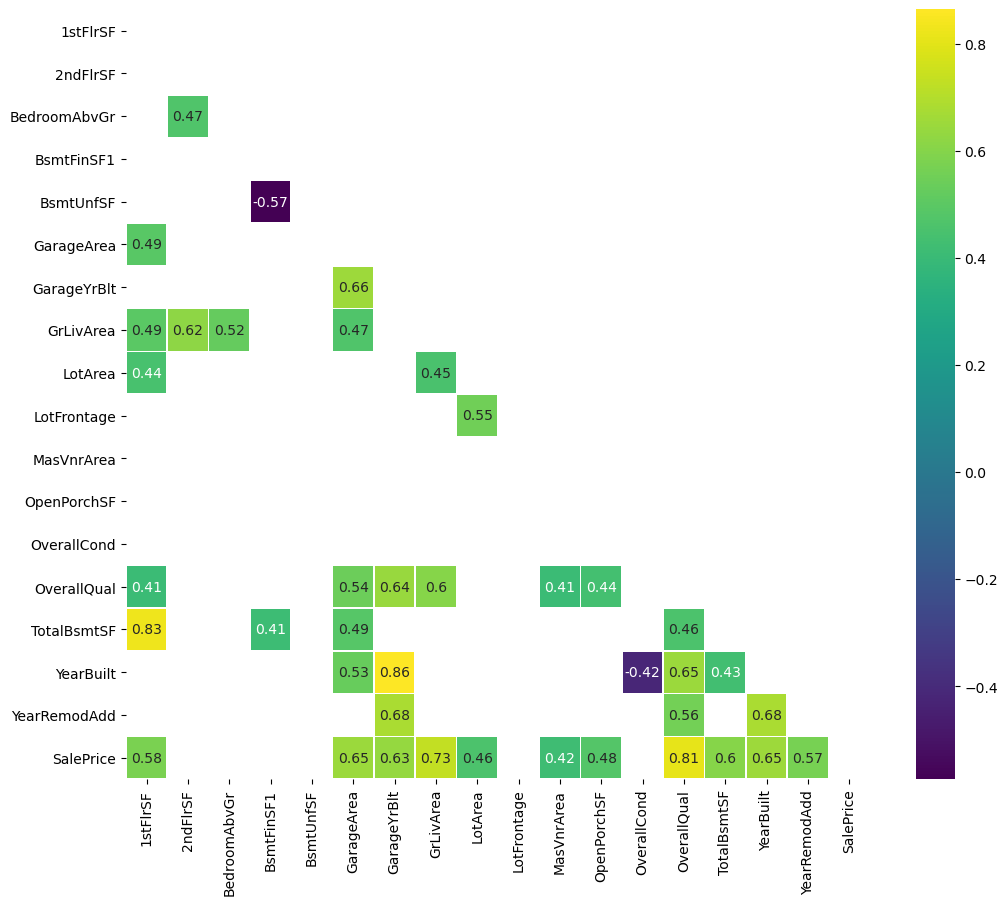



*** Heatmap: Pearson Correlation ***
This evaluates the linear relationship between two continuous variables 



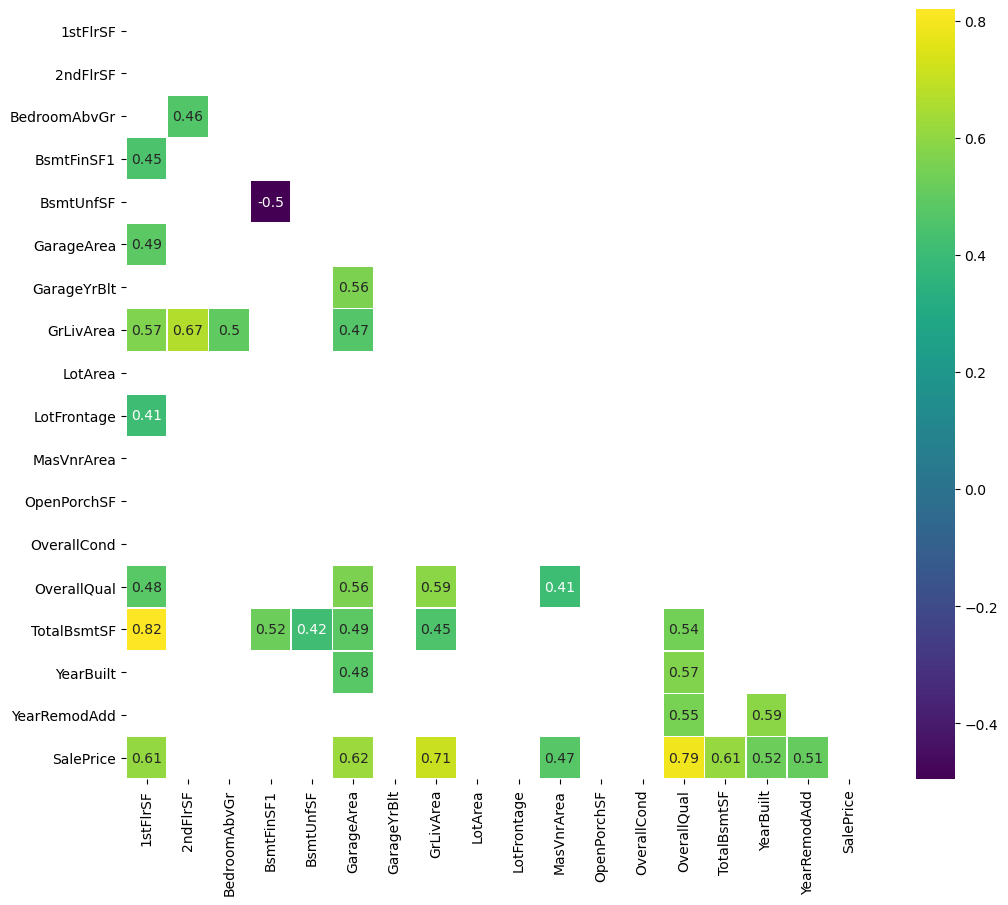



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



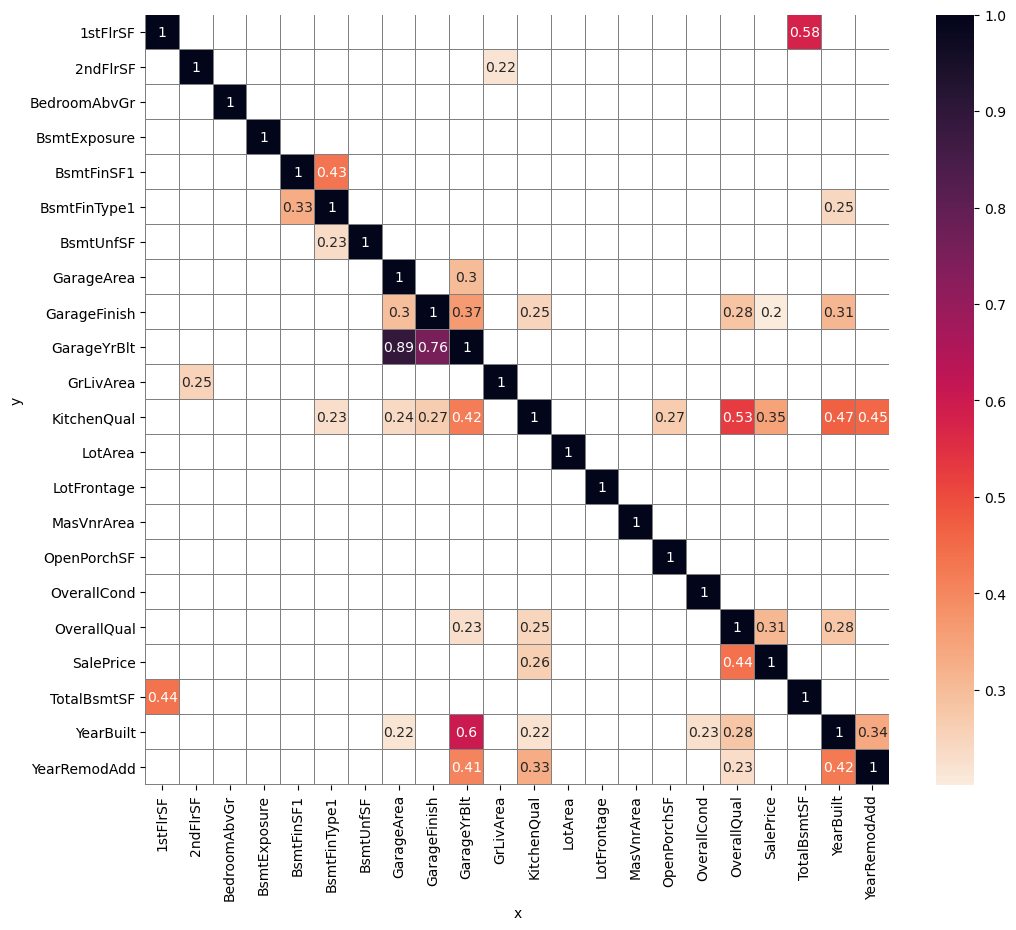

In [10]:
display_corr_and_pps(df_corr_pearson = df_corr_pearson,
                    df_corr_spearman = df_corr_spearman, 
                    pps_matrix = pps_matrix,
                    CorrThreshold = 0.4, PPS_Threshold =0.2,
                    figsize=(12,10), font_annot=10)

Examining the heatmaps, we see that both the Spearman and Pearson methods show positive correlation between the target feature `SalePrice` and several of the other variables.


* The Spearman correlation shows a correlation between `SalePrice` and the following variables:
    - `1stFlrSF`
    - `GarageArea`
    - `GarageYrBlt`
    - `GrLivArea`
    - `LotArea`
    - `MasVnrArea`
    - `OpenPorchSF`
    - `OverallQual`
    - `TotalBsmtSF`
    - `YearBuilt`
    - `YearRemodAdd`

* The Pearson correlation shows a correlation between `SalePrice` and the following variables:
    - `1stFlrSF`
    - `GarageArea`
    - `GrLivArea`
    - `MasVnrArea`
    - `OverallQual`
    - `TotalBsmtSF`
    - `YearBuilt`
    - `YearRemodAdd`

* In the PPS heatmap, we see strong correlations (PPS above 0.2) between `SalePrice` and the following variables (note: see [this discussion]( https://github.com/8080labs/ppscore/issues/39) for guidance on the interpretation of PPS):
    - `OverallQual`
    - `KitchenQual`

## Selection of variables to study

We use the `.corr()` method to evaluate both Spearman and Pearson correlations, and will select the top 10 correlations.
* Note that this method returns a Pandas series and the first item is the correlation between `SalePrice` and itself, which by definition is 1, so we exclude that with `[1:]`.
* We then sort values by the absolute value, by setting `key=abs`.

In [11]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
GarageYrBlt       0.634095
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [12]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

We can now merge the Spearman and Pearson correlations, and consider the top ten correlation levels:

In [13]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

We note that this list also includes the two variables that PPS found were strongly correlated with a house's sale price. We therefore decide to study the following variables more closely:
* `1stFlrSF`
* `GarageArea`
* `GarageYrBlt`
* `GrLivArea`
* `KitchenQual`
* `MasVnrArea`
* `OverallQual`
* `TotalBsmtSF`
* `YearBuilt`
* `YearRemodAdd`

We note that these variables represent a house's size, quality, garage area and year built, and when the house was built (or remodelled).

In [14]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'MasVnrArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'MasVnrArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

---

# EDA on selected variables

We create a new dataframe to conduct exploratory data analysis on the variables that are most relevant to a house's sale price:

In [15]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,MasVnrArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2003.0,1710,Gd,196.0,7,856,2003,2003,208500
1,1262,460,1976.0,1262,TA,0.0,6,1262,1976,1976,181500
2,920,608,2001.0,1786,Gd,162.0,7,920,2001,2002,223500
3,961,642,1998.0,1717,Gd,0.0,7,756,1915,1970,140000
4,1145,836,2000.0,2198,Gd,350.0,8,1145,2000,2000,250000


To better understand these variables, we will create some plots to visualise them:
* First we create a histogram of the target variable `SalePrice`, including a KDE line to show a smoother representation of its distribution.
* 

[WinError 183] Cannot create a file when that file already exists: 'outputs/plots/variable_plots/v1'


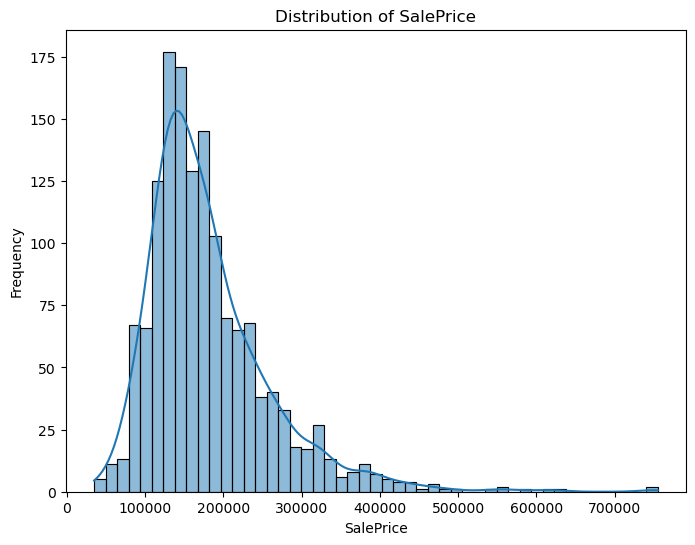

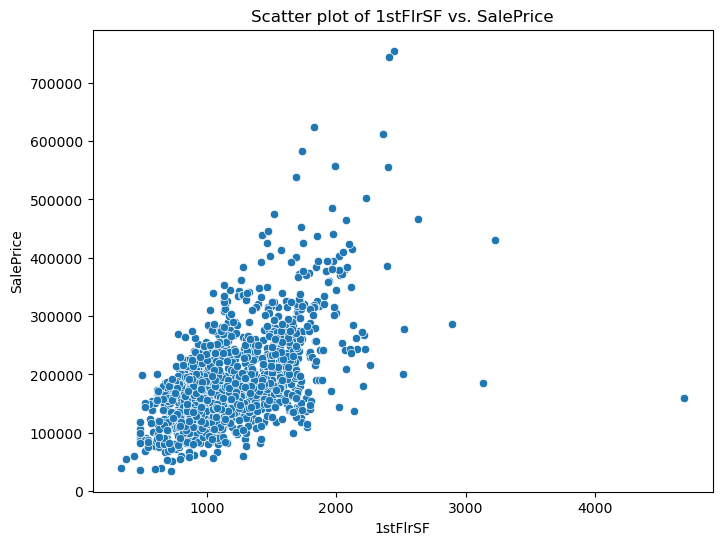

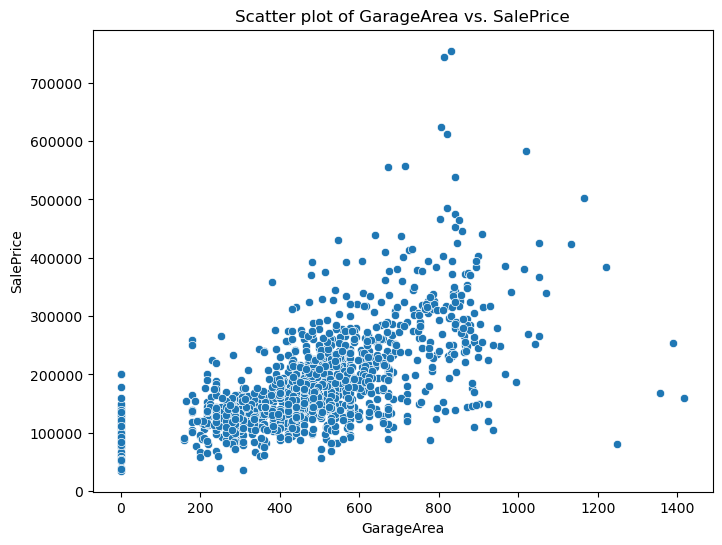

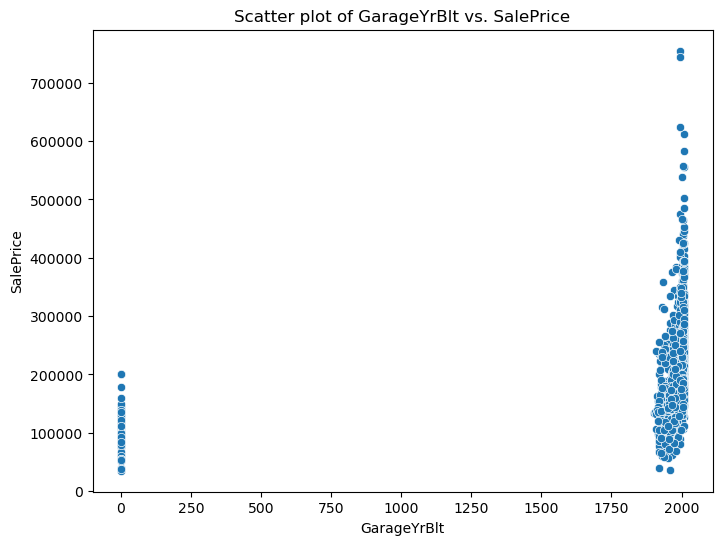

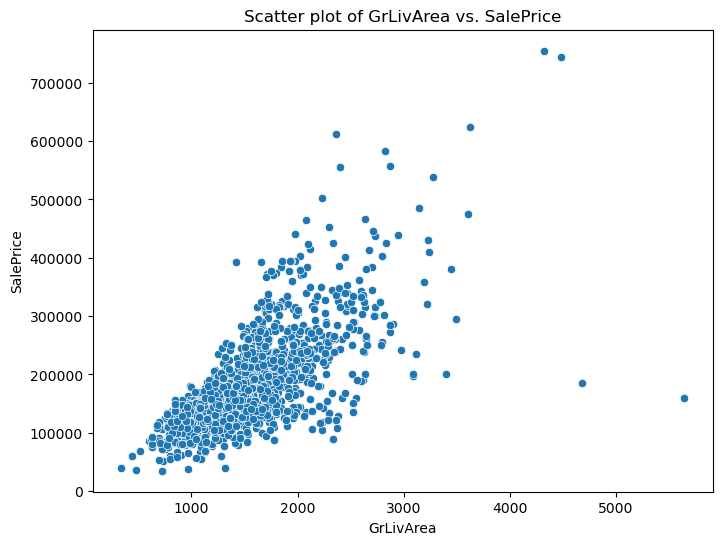

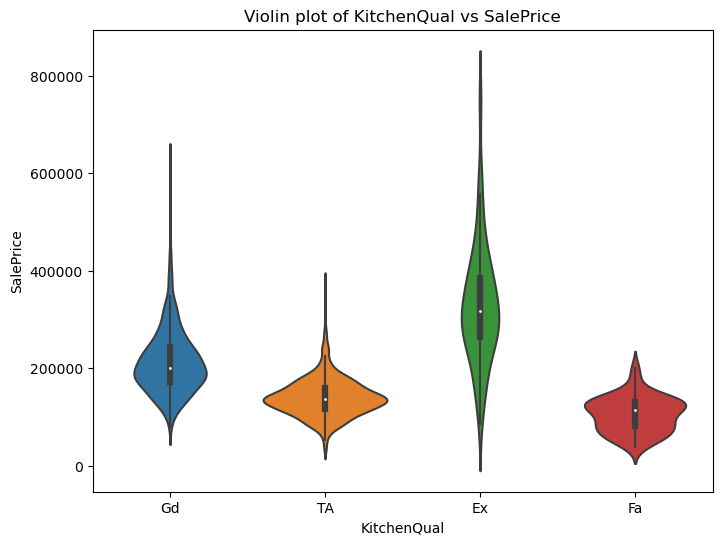

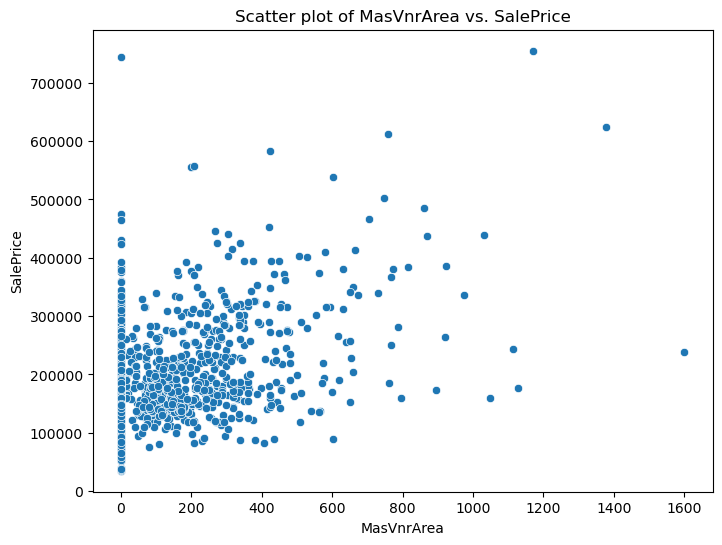

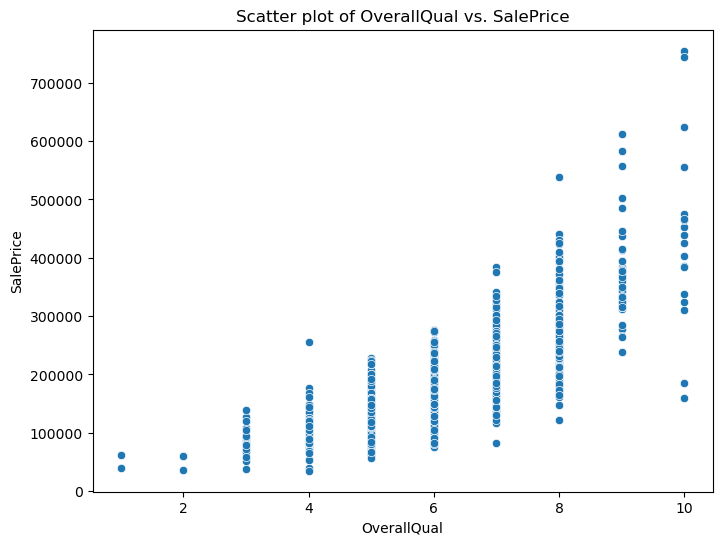

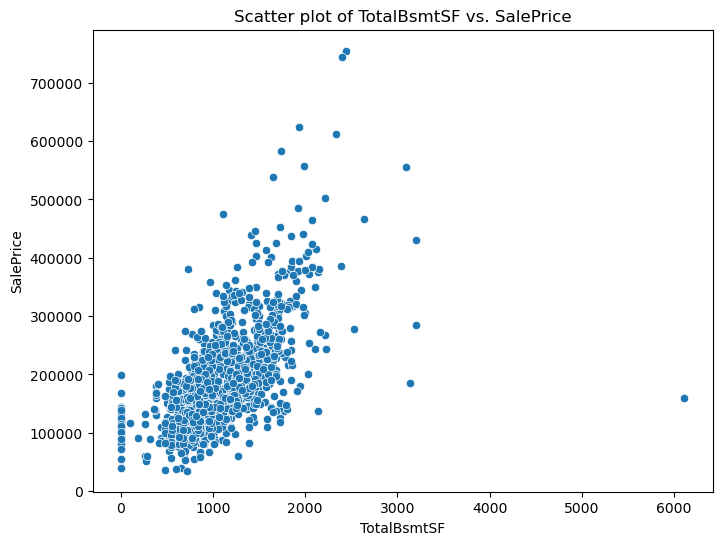

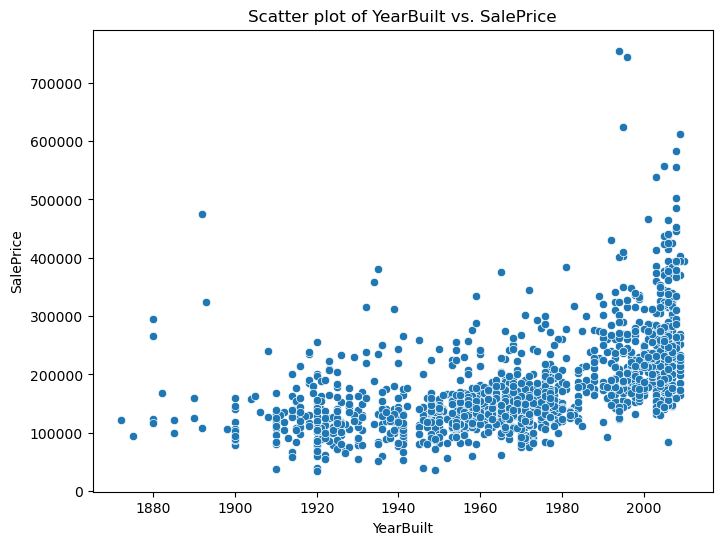

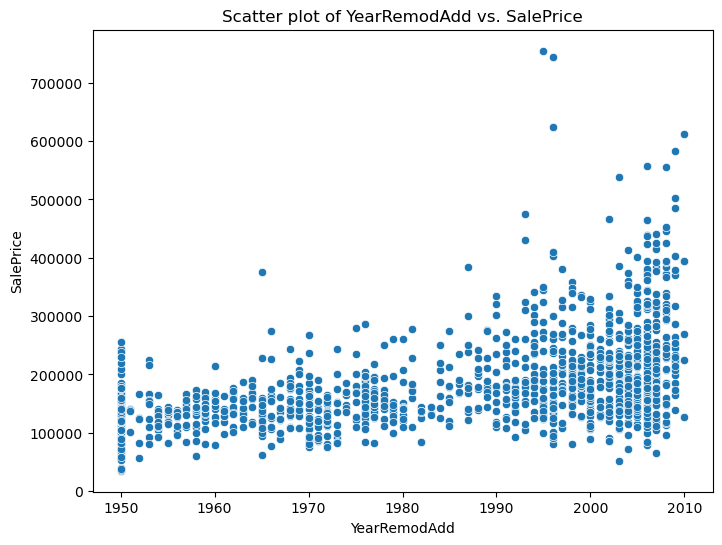

In [19]:
target_var = 'SalePrice'
file_path = f'outputs/plots/variable_plots/v1'

def plot_eda_charts(df_eda, target_var, file_path):
    """
    Creates folder if it does not already exist
    Creates graphs according to variable type
    Saves graphs to folder
    """
    # creates the folder
    try:
        os.makedirs(name=file_path)
    except Exception as e:
        print(e)

    # plots histogram of target variable with KDE line
    plt.figure(figsize = (8, 6))
    sns.histplot(df_eda[target_var], kde=True)
    plt.title(f"Distribution of {target_var}")
    plt.xlabel(target_var)
    plt.ylabel("Frequency")
    plt.savefig(f"{file_path}/hist_plot_{target_var}.png", bbox_inches="tight")
    plt.show()
    
    # loops through variables and generates plots according to dtype
    for col in df_eda.columns:
        if col == target_var:
            continue

        if df_eda[col].dtype != 'object':
            # plot scatter plots for numerical vars
            plt.figure(figsize = (8, 6))
            sns.scatterplot(x=col, y=target_var, data=df_eda)
            plt.title(f"Scatter plot of {col} vs. {target_var}")
            plt.savefig(f"{file_path}/scatterplot_{col}.png", bbox_inches="tight")
            plt.show()
        elif df_eda[col].dtype == 'object':
            # plot violin plots for categorical vars
            plt.figure(figsize = (8, 6))
            sns.violinplot(x=col, y=target_var, data=df_eda)
            plt.title(f"Violin plot of {col} vs {target_var}")
            plt.xlabel(col)
            plt.ylabel(target_var)
            plt.savefig(f"{file_path}/violin_plot_{col}.png", bbox_inches="tight")
            plt.show()

plot_eda_charts(df_eda, target_var, file_path)

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [17]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (2852421808.py, line 5)